In [201]:
from keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(x_train, _), (x_test, _) = load_data()
x_train = x_train / 255
x_train = x_train.reshape(-1, 784)
x_train = x_train[:20].T
x_train.shape

(784, 20)

In [202]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)

In [203]:
sigma = np.cov(x_train)
sigma.shape

(784, 784)

In [204]:
u, s, v = np.linalg.svd(sigma)
u.shape

(784, 784)

In [214]:
## Plain PCA

k = 144

p = u[:, :k]
X = p.T.dot(x_train)
X.shape

(144, 20)

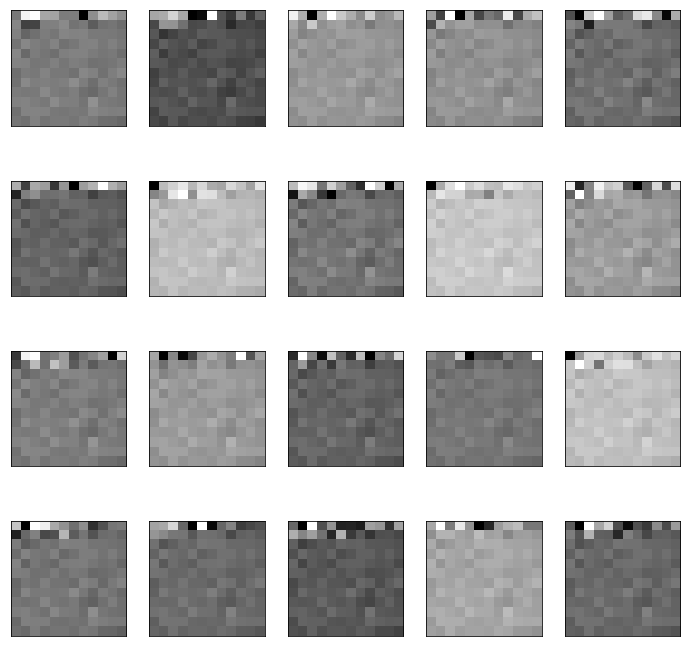

In [215]:
n = 20
plt.figure(figsize = (12, 12))
for i in range(n):
    
    ax = plt.subplot(4,5,i+1)
    plt.imshow(X.T[i].reshape(12,12))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Whitening

In [225]:
x = u.T.dot(x_train)
l, _ = np.linalg.eig(sigma)
for i in range(784):
    x[i, :] = x[i, :] / np.sqrt(l[i])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [226]:
z = x[:k, :].T
z.shape

(20, 144)

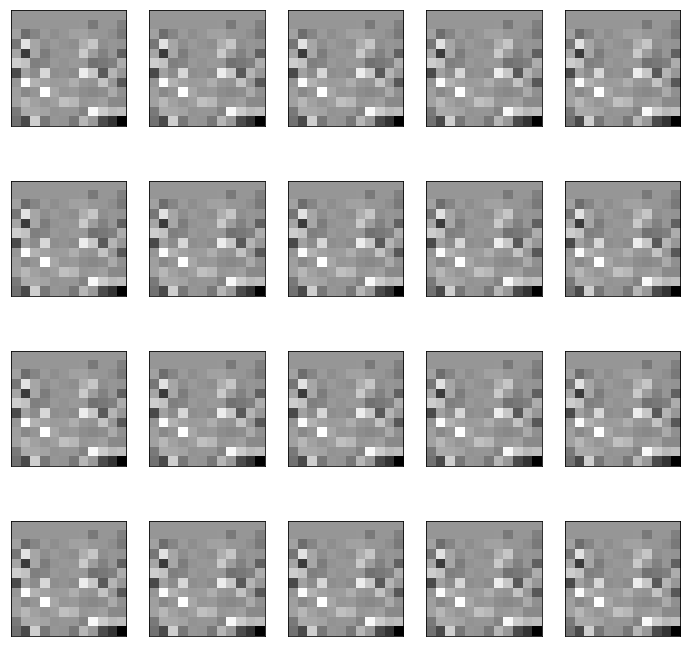

In [227]:
n = 20
plt.figure(figsize = (12, 12))
for i in range(n):
    
    ax = plt.subplot(4,5,i+1)
    plt.imshow(z[i].reshape(12,12))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## ZCA Whitening

In [229]:
a = u.dot(x)
a = a[:k, :].T
a.shape

(20, 144)

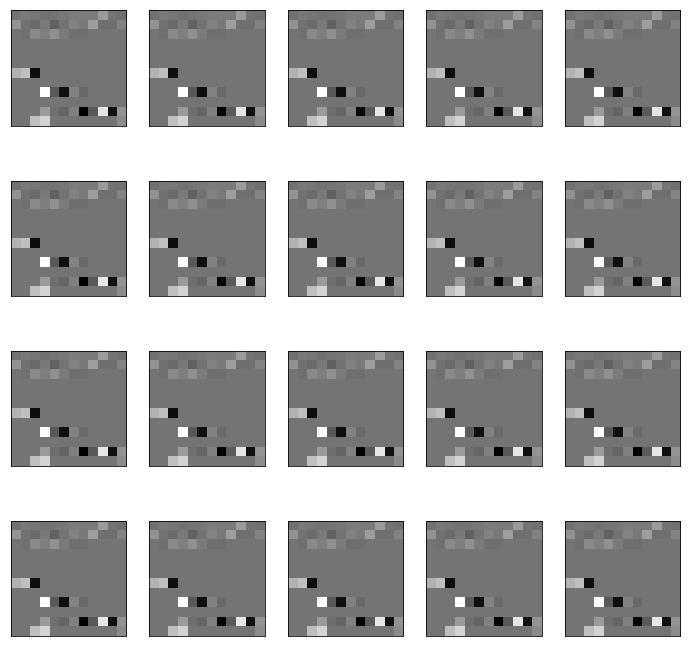

In [230]:
n = 20
plt.figure(figsize = (12, 12))
for i in range(n):
    
    ax = plt.subplot(4,5,i+1)
    plt.imshow(a[i].reshape(12,12))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()